In [29]:
## Libraries to import
import scipy.special as sps
import numpy as np
import math
from matplotlib import pyplot as plt

# Array for testing
a = np.arange(-5,5,0.05)
# Sample data
d = [178,176,171,164,171,164,159,163,160,170,181,153]

In [30]:
def dist(x, mu = 0, sigma = 1):
    return 0.5 * (1 + sps.erf((x-mu)/(np.sqrt(2*sigma**2)))) 
def analyze(data, p=0.05):
    x_mean = np.mean(data)
    sigma_one = np.std(data, ddof=1)
    print('result = ('+str(x_mean)+'+-'+str(sigma_one/np.sqrt(len(data)))+')unit')
    print('single measurement std = '+str(sigma_one)+' unit')
    abs_dev = abs(data-x_mean)
    
    npdata = np.array(data)
    twosigma = abs_dev<sigma_one*2
    twosigmapass = np.sum(twosigma)==len(data)
    twosigma = npdata[twosigma]
    
    threesigma = abs_dev<sigma_one*3
    threesigmapass =  np.sum(threesigma)==len(data)
    threesigma = npdata[threesigma]
    
    probs = dist(npdata, x_mean, sigma_one)
    phalf = p/2
    
    aa= np.array(p<probs).astype(int)
    bb = np.array(probs<(1-p)).astype(int)
    ptwosided = (np.floor((aa+bb)/2).astype(bool))
    ptwosidedpass = np.sum(ptwosided)==len(data)
    ptwosided = npdata[ptwosided]
    
    aa= np.array(phalf<probs).astype(int)
    bb = np.array(probs<(1-phalf)).astype(int)
    ponesided = (np.floor((aa+bb)/2).astype(bool))
    ponesidedpass = np.sum(ponesided)==len(data)
    ponesided = npdata[ponesided]
    
    
    print('meets 2 sigma criterium: ' + str(twosigmapass))
    print(twosigma)
    print('meets 3 sigma criterium: ' + str(threesigmapass))
    print(threesigma)
    print('meets double sided p criterium: ' + str(ptwosidedpass))
    print(ptwosided)
    print('meets single sided p criterium: ' + str(ponesidedpass))
    print(ponesided)
    

    return x_mean, sigma_one, sigma_one/np.sqrt(len(data)), twosigma, threesigma, ptwosided, ponesided


In [4]:
analyze(data)

result = (8.333333333333334+-8.333333333333334)unit
single measurement std = 20.41241452319315 unit
meets 2 sigma criterium: False
[0 0 0 0 0]
meets 3 sigma criterium: True
[ 0  0  0  0  0 50]
meets double sided p criterium: False
[0 0 0 0 0]
meets single sided p criterium: False
[0 0 0 0 0]


(8.333333333333334,
 20.41241452319315,
 8.333333333333334,
 array([0, 0, 0, 0, 0]),
 array([ 0,  0,  0,  0,  0, 50]),
 array([0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0]))

__WAVES DATA__

In [94]:
import scipy.io
a = scipy.io.loadmat("wave lagsv3.mat")
lags = a["lags"]

In [95]:
lsr = 24576
lsp = 1/lsr

In [96]:
[_, _, _, twosigma, threesigma, _, _] = analyze(lags)

result = (7.065447118660231e-05+-3.334853114870117e-05)unit
single measurement std = 3.334853114870117e-05 unit
meets 2 sigma criterium: False
[8.77402127e-05 9.15550045e-05 6.48514615e-05 6.10366697e-05
 6.48514615e-05 6.86662534e-05 7.62958371e-05 8.01106290e-05
 6.48514615e-05 6.48514615e-05 6.10366697e-05 5.72218778e-05
 7.62958371e-05 8.01106290e-05 7.62958371e-05 8.39254208e-05
 6.48514615e-05 6.10366697e-05 7.62958371e-05 7.62958371e-05
 7.24810453e-05 7.24810453e-05 5.72218778e-05 5.72218778e-05
 6.48514615e-05 6.86662534e-05 4.95922941e-05 5.34070860e-05
 6.10366697e-05 6.10366697e-05 6.10366697e-05 6.10366697e-05
 6.48514615e-05 6.86662534e-05 7.62958371e-05 7.62958371e-05
 6.86662534e-05 7.24810453e-05 8.39254208e-05 8.39254208e-05
 8.01106290e-05 8.01106290e-05 7.62958371e-05 7.24810453e-05
 6.48514615e-05 6.48514615e-05 6.48514615e-05 6.48514615e-05
 6.10366697e-05 6.10366697e-05 7.62958371e-05 6.86662534e-05
 4.95922941e-05 5.34070860e-05 7.62958371e-05 7.62958371e-05
 6.

In [99]:
[_, _, _, twosigma, threesigma, _, _] = analyze(threesigma)

result = (6.884635086711814e-05+-6.376854122214801e-07)unit
single measurement std = 9.733845365306479e-06 unit
meets 2 sigma criterium: False
[8.77402127e-05 6.48514615e-05 6.10366697e-05 6.48514615e-05
 6.86662534e-05 7.62958371e-05 8.01106290e-05 6.48514615e-05
 6.48514615e-05 6.10366697e-05 5.72218778e-05 7.62958371e-05
 8.01106290e-05 7.62958371e-05 8.39254208e-05 6.48514615e-05
 6.10366697e-05 7.62958371e-05 7.62958371e-05 7.24810453e-05
 7.24810453e-05 5.72218778e-05 5.72218778e-05 6.48514615e-05
 6.86662534e-05 4.95922941e-05 5.34070860e-05 6.10366697e-05
 6.10366697e-05 6.10366697e-05 6.10366697e-05 6.48514615e-05
 6.86662534e-05 7.62958371e-05 7.62958371e-05 6.86662534e-05
 7.24810453e-05 8.39254208e-05 8.39254208e-05 8.01106290e-05
 8.01106290e-05 7.62958371e-05 7.24810453e-05 6.48514615e-05
 6.48514615e-05 6.48514615e-05 6.48514615e-05 6.10366697e-05
 6.10366697e-05 7.62958371e-05 6.86662534e-05 4.95922941e-05
 5.34070860e-05 7.62958371e-05 7.62958371e-05 6.86662534e-05
 7.

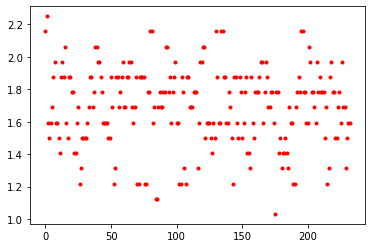

In [100]:
plt.plot(threesigma/lsp, 'r.')

In [103]:
[_, _, _, twosigma, _, _, _] = analyze(twosigma)

result = (7.029568710463768e-05+-4.894760825937679e-07)unit
single measurement std = 6.904909865511416e-06 unit
meets 2 sigma criterium: True
[6.48514615e-05 6.10366697e-05 6.48514615e-05 6.86662534e-05
 7.62958371e-05 8.01106290e-05 6.48514615e-05 6.48514615e-05
 6.10366697e-05 5.72218778e-05 7.62958371e-05 8.01106290e-05
 7.62958371e-05 8.39254208e-05 6.48514615e-05 6.10366697e-05
 7.62958371e-05 7.62958371e-05 7.24810453e-05 7.24810453e-05
 5.72218778e-05 5.72218778e-05 6.48514615e-05 6.86662534e-05
 6.10366697e-05 6.10366697e-05 6.10366697e-05 6.10366697e-05
 6.48514615e-05 6.86662534e-05 7.62958371e-05 7.62958371e-05
 6.86662534e-05 7.24810453e-05 8.39254208e-05 8.39254208e-05
 8.01106290e-05 8.01106290e-05 7.62958371e-05 7.24810453e-05
 6.48514615e-05 6.48514615e-05 6.48514615e-05 6.48514615e-05
 6.10366697e-05 6.10366697e-05 7.62958371e-05 6.86662534e-05
 7.62958371e-05 7.62958371e-05 6.86662534e-05 7.24810453e-05
 7.62958371e-05 8.01106290e-05 6.86662534e-05 6.86662534e-05
 7.6

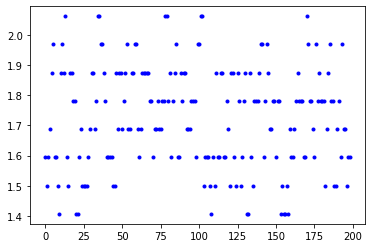

In [104]:
plt.plot(twosigma/lsp, 'b.')

In [105]:
print('WAVE DATA TDS voltade_data - LFR delays')
print('Two sigma mean: ' + str(np.mean(twosigma/lsp)))
print('Two sigma std: ' + str(np.std(twosigma/lsp,ddof=1)))

print('Three sigma mean: ' + str(np.mean(threesigma/lsp)))
print('Three sigma std: ' + str(np.std(threesigma/lsp,ddof=1)))

WAVE DATA TDS voltade_data - LFR delays
Two sigma mean: 1.7275868062835755
Two sigma std: 0.16969506485480854
Three sigma mean: 1.6919679189102959
Three sigma std: 0.23921898369777203


__DUST DATA__

In [108]:
import scipy.io
a = scipy.io.loadmat("dust lagsv3.mat")
dust_lags = a["dust_lags"]
lsr = 24576
lsp = 1/lsr

In [80]:
[_, _, _, twosigma, threesigma, _, _] = analyze(dust_lags)

result = (0.00011082974232586856+-0.0002201819744185443)unit
single measurement std = 0.0002201819744185443 unit
meets 2 sigma criterium: False
[ 4.95922941e-05  1.60221258e-04  1.83110009e-04 -9.15550045e-05
  8.39254208e-05  8.39254208e-05 -1.06814172e-04 -7.24810453e-05
  3.54775643e-04  7.82032330e-05  8.01106290e-05  8.96476086e-05
  9.91845882e-05  7.24810453e-05  7.24810453e-05  6.86662534e-05
  7.62958371e-05  4.19627104e-05  5.72218778e-05  3.81479186e-06
  8.39254208e-05  1.06814172e-04  6.86662534e-05  7.24810453e-05
  6.48514615e-05  7.24810453e-05  7.24810453e-05  3.81479186e-05
  4.19627104e-05  5.72218778e-05  5.72218778e-05  5.34070860e-05
  7.62958371e-05  6.86662534e-05]
meets 3 sigma criterium: False
[ 4.95922941e-05  1.60221258e-04  1.83110009e-04 -9.15550045e-05
  8.39254208e-05  8.39254208e-05 -3.73849602e-04 -1.06814172e-04
 -7.24810453e-05  3.54775643e-04  7.82032330e-05  8.01106290e-05
  8.96476086e-05  9.91845882e-05  7.24810453e-05  7.24810453e-05
  6.8666253

In [83]:
[_, _, _, twosigma, threesigma, _, _] = analyze(threesigma)

result = (5.9533872895181355e-05+-1.0048091288158574e-05)unit
single measurement std = 5.772188988295993e-05 unit
meets 2 sigma criterium: False
[4.95922941e-05 1.60221258e-04 8.39254208e-05 8.39254208e-05
 7.82032330e-05 8.01106290e-05 8.96476086e-05 9.91845882e-05
 7.24810453e-05 7.24810453e-05 6.86662534e-05 7.62958371e-05
 4.19627104e-05 5.72218778e-05 3.81479186e-06 8.39254208e-05
 1.06814172e-04 6.86662534e-05 7.24810453e-05 6.48514615e-05
 7.24810453e-05 7.24810453e-05 3.81479186e-05 4.19627104e-05
 5.72218778e-05 5.72218778e-05 5.34070860e-05 7.62958371e-05
 6.86662534e-05]
meets 3 sigma criterium: True
[ 4.95922941e-05  1.60221258e-04  1.83110009e-04 -9.15550045e-05
  8.39254208e-05  8.39254208e-05 -1.06814172e-04 -7.24810453e-05
  7.82032330e-05  8.01106290e-05  8.96476086e-05  9.91845882e-05
  7.24810453e-05  7.24810453e-05  6.86662534e-05  7.62958371e-05
  4.19627104e-05  5.72218778e-05  3.81479186e-06  8.39254208e-05
  1.06814172e-04  6.86662534e-05  7.24810453e-05  6.4851

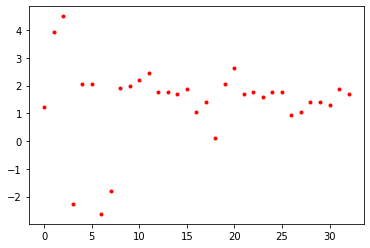

In [84]:
plt.plot(threesigma/lsp, 'r.')

In [90]:
[_, _, _, twosigma, _, _, _] = analyze(twosigma)

result = (7.092044858484228e-05+-2.299160897777454e-06)unit
single measurement std = 1.0784020509305157e-05 unit
meets 2 sigma criterium: True
[4.95922941e-05 8.39254208e-05 8.39254208e-05 7.82032330e-05
 8.01106290e-05 8.96476086e-05 7.24810453e-05 7.24810453e-05
 6.86662534e-05 7.62958371e-05 5.72218778e-05 8.39254208e-05
 6.86662534e-05 7.24810453e-05 6.48514615e-05 7.24810453e-05
 7.24810453e-05 5.72218778e-05 5.72218778e-05 5.34070860e-05
 7.62958371e-05 6.86662534e-05]
meets 3 sigma criterium: True
[4.95922941e-05 8.39254208e-05 8.39254208e-05 7.82032330e-05
 8.01106290e-05 8.96476086e-05 7.24810453e-05 7.24810453e-05
 6.86662534e-05 7.62958371e-05 5.72218778e-05 8.39254208e-05
 6.86662534e-05 7.24810453e-05 6.48514615e-05 7.24810453e-05
 7.24810453e-05 5.72218778e-05 5.72218778e-05 5.34070860e-05
 7.62958371e-05 6.86662534e-05]
meets double sided p criterium: False
[8.39254208e-05 8.39254208e-05 7.82032330e-05 8.01106290e-05
 7.24810453e-05 7.24810453e-05 6.86662534e-05 7.629583

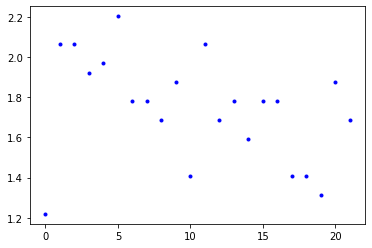

In [91]:
plt.plot(twosigma/lsp, 'b.')

In [93]:
print('DUST DATA TDS voltade_data - LFR delays')
print('Two sigma mean: ' + str(np.mean(twosigma/lsp)))
print('Two sigma std: ' + str(np.std(twosigma/lsp,ddof=1)))

print('Three sigma mean: ' + str(np.mean(threesigma/lsp)))
print('Three sigma std: ' + str(np.std(threesigma/lsp,ddof=1)))

DUST DATA TDS voltade_data - LFR delays
Two sigma mean: 1.742940944421084
Two sigma std: 0.26502808803668354
Three sigma mean: 1.4631044602719774
Three sigma std: 1.4185731657636234


__ALL DATA__

In [54]:
dlags = dust_lags.tolist()
dlags = dlags[0]
a = scipy.io.loadmat("wave lagsv3.mat")
lags = a["lags"][0]
data = np.array(lags.tolist() + dlags)

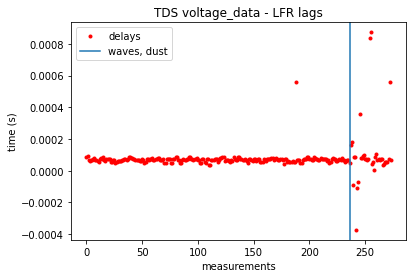

In [73]:
plt.plot(data, 'r.')
plt.title('TDS voltage_data - LFR lags')
plt.xlabel('measurements')
plt.ylabel('time (s)')
plt.axvline(len(lags))
plt.legend(['delays', 'waves, dust'])

In [56]:
[mu, sigma, sig, twosigma, threesigma, _, _] = analyze(data)

result = (7.622622411832536e-05+-5.308509577543759e-06)unit
single measurement std = 8.787146896550339e-05 unit
meets 2 sigma criterium: False
[ 8.77402127e-05  9.15550045e-05  6.48514615e-05  6.10366697e-05
  6.48514615e-05  6.86662534e-05  7.62958371e-05  8.01106290e-05
  6.48514615e-05  6.48514615e-05  6.10366697e-05  5.72218778e-05
  7.62958371e-05  8.01106290e-05  7.62958371e-05  8.39254208e-05
  6.48514615e-05  6.10366697e-05  7.62958371e-05  7.62958371e-05
  7.24810453e-05  7.24810453e-05  5.72218778e-05  5.72218778e-05
  6.48514615e-05  6.86662534e-05  4.95922941e-05  5.34070860e-05
  6.10366697e-05  6.10366697e-05  6.10366697e-05  6.10366697e-05
  6.48514615e-05  6.86662534e-05  7.62958371e-05  7.62958371e-05
  6.86662534e-05  7.24810453e-05  8.39254208e-05  8.39254208e-05
  8.01106290e-05  8.01106290e-05  7.62958371e-05  7.24810453e-05
  6.48514615e-05  6.48514615e-05  6.48514615e-05  6.48514615e-05
  6.10366697e-05  6.10366697e-05  7.62958371e-05  6.86662534e-05
  4.95922941

In [59]:
[IIImu, IIIsigma, IIIsig, twosigma, threesigma, _, _] = analyze(threesigma)

result = (6.85785570330566e-05+-6.614812519806036e-07)unit
single measurement std = 1.0686556676235652e-05 unit
meets 2 sigma criterium: False
[8.77402127e-05 6.48514615e-05 6.10366697e-05 6.48514615e-05
 6.86662534e-05 7.62958371e-05 8.01106290e-05 6.48514615e-05
 6.48514615e-05 6.10366697e-05 5.72218778e-05 7.62958371e-05
 8.01106290e-05 7.62958371e-05 8.39254208e-05 6.48514615e-05
 6.10366697e-05 7.62958371e-05 7.62958371e-05 7.24810453e-05
 7.24810453e-05 5.72218778e-05 5.72218778e-05 6.48514615e-05
 6.86662534e-05 4.95922941e-05 5.34070860e-05 6.10366697e-05
 6.10366697e-05 6.10366697e-05 6.10366697e-05 6.48514615e-05
 6.86662534e-05 7.62958371e-05 7.62958371e-05 6.86662534e-05
 7.24810453e-05 8.39254208e-05 8.39254208e-05 8.01106290e-05
 8.01106290e-05 7.62958371e-05 7.24810453e-05 6.48514615e-05
 6.48514615e-05 6.48514615e-05 6.48514615e-05 6.10366697e-05
 6.10366697e-05 7.62958371e-05 6.86662534e-05 4.95922941e-05
 5.34070860e-05 7.62958371e-05 7.62958371e-05 6.86662534e-05
 7.

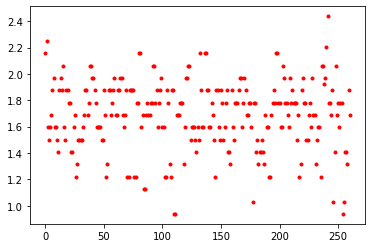

In [60]:
plt.plot(threesigma/lsp, 'r.')

In [63]:
[IImu, IIsigma, IIsig, twosigma, _, _, _] = analyze(twosigma)

result = (7.04424064861961e-05+-4.777628055887825e-07)unit
single measurement std = 7.054083289279062e-06 unit
meets 2 sigma criterium: True
[6.48514615e-05 6.10366697e-05 6.48514615e-05 6.86662534e-05
 7.62958371e-05 8.01106290e-05 6.48514615e-05 6.48514615e-05
 6.10366697e-05 5.72218778e-05 7.62958371e-05 8.01106290e-05
 7.62958371e-05 8.39254208e-05 6.48514615e-05 6.10366697e-05
 7.62958371e-05 7.62958371e-05 7.24810453e-05 7.24810453e-05
 5.72218778e-05 5.72218778e-05 6.48514615e-05 6.86662534e-05
 6.10366697e-05 6.10366697e-05 6.10366697e-05 6.10366697e-05
 6.48514615e-05 6.86662534e-05 7.62958371e-05 7.62958371e-05
 6.86662534e-05 7.24810453e-05 8.39254208e-05 8.39254208e-05
 8.01106290e-05 8.01106290e-05 7.62958371e-05 7.24810453e-05
 6.48514615e-05 6.48514615e-05 6.48514615e-05 6.48514615e-05
 6.10366697e-05 6.10366697e-05 7.62958371e-05 6.86662534e-05
 7.62958371e-05 7.62958371e-05 6.86662534e-05 7.24810453e-05
 7.62958371e-05 8.01106290e-05 6.86662534e-05 6.86662534e-05
 7.62

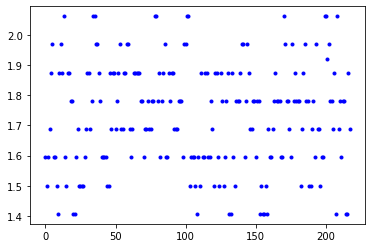

In [64]:
plt.plot(twosigma/lsp, 'b.')

In [78]:
print('ALL DATA TDS voltade_data - LFR delays')
print('Two sigma mean: ' + str(np.mean(twosigma/lsp)))
print('Two sigma std: ' + str(np.std(twosigma/lsp,ddof=1)))

print('Three sigma mean: ' + str(np.mean(threesigma/lsp)))
print('Three sigma std: ' + str(np.std(threesigma/lsp,ddof=1)))

ALL DATA TDS voltade_data - LFR delays
Two sigma mean: 1.7311925818047555
Two sigma std: 0.17336115091732224
Three sigma mean: 1.685386617644399
Three sigma std: 0.2626328168751674


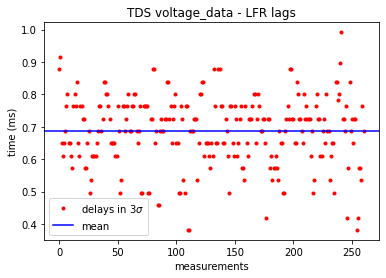

In [77]:
plt.plot(10e3*threesigma, 'r.')
plt.title('TDS voltage_data - LFR lags')
plt.xlabel('measurements')
plt.ylabel('time (ms)')
plt.axhline(y = 10e3*threesigma.mean(), color = 'b', linestyle = '-')
plt.legend(['delays in 3$\sigma$', 'mean'])


__COMPARING TDS voltage_data to waveform_data__

In [107]:
import scipy.io
a = scipy.io.loadmat("voltage-waveform_lags_v3.mat")
lags = a["dust_lags"]

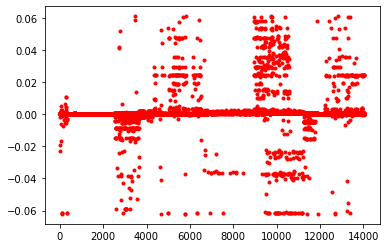

In [119]:
plt.plot(lags[0], 'r.')

In [108]:
[_, _, _, twosigma, threesigma, _, _] = analyze(lags)

result = (0.0008109301998246297+-0.008304823102521588)unit
single measurement std = 0.008304823102521588 unit
meets 2 sigma criterium: False
[8.81216919e-04 8.81216919e-04 8.77402127e-04 ... 8.77402127e-05
 8.39254208e-05 1.48776882e-04]
meets 3 sigma criterium: False
[8.81216919e-04 8.81216919e-04 8.77402127e-04 ... 8.39254208e-05
 2.41590768e-02 1.48776882e-04]
meets double sided p criterium: False
[8.81216919e-04 8.81216919e-04 8.77402127e-04 ... 8.77402127e-05
 8.39254208e-05 1.48776882e-04]
meets single sided p criterium: False
[8.81216919e-04 8.81216919e-04 8.77402127e-04 ... 8.77402127e-05
 8.39254208e-05 1.48776882e-04]


In [114]:
[_, _, _, twosigma, threesigma, _, _] = analyze(threesigma)

result = (0.0004538217223063642+-3.6454554407026196e-06)unit
single measurement std = 0.0004125489621311508 unit
meets 2 sigma criterium: False
[8.81216919e-04 8.81216919e-04 8.77402127e-04 ... 8.77402127e-05
 8.39254208e-05 1.48776882e-04]
meets 3 sigma criterium: True
[8.81216919e-04 8.81216919e-04 8.77402127e-04 ... 8.77402127e-05
 8.39254208e-05 1.48776882e-04]
meets double sided p criterium: False
[8.81216919e-04 8.81216919e-04 8.77402127e-04 ... 8.77402127e-05
 8.39254208e-05 1.48776882e-04]
meets single sided p criterium: False
[8.81216919e-04 8.81216919e-04 8.77402127e-04 ... 8.77402127e-05
 8.39254208e-05 1.48776882e-04]


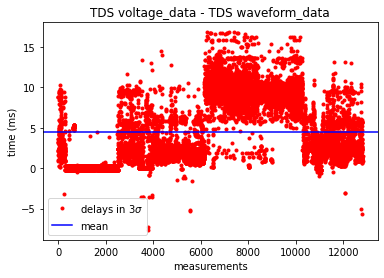

In [116]:
plt.plot(10e3*threesigma, 'r.')
plt.title('TDS voltage_data - TDS waveform_data')
plt.xlabel('measurements')
plt.ylabel('time (ms)')
plt.axhline(y = 10e3*threesigma.mean(), color = 'b', linestyle = '-')
plt.legend(['delays in 3$\sigma$', 'mean'])

In [111]:
import scipy.io
a = scipy.io.loadmat("2021 waveform voltage lags.mat")
b = scipy.io.loadmat("2020 waveform voltage lags.mat")

In [62]:
a

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Feb  3 12:53:43 2022',
 '__version__': '1.0',
 '__globals__': [],
 'avglags': array([[ 3.58162372e-04,  4.70368604e-04,  3.87799214e-04,
          2.55059975e-04,  2.40537765e-04,  4.00870554e-04,
          3.28668161e-04,  2.69116611e-04,  1.99892802e-04,
          3.50874641e-04,  3.77290838e-04,  2.13068782e-04,
          1.75394603e-04,  1.58134938e-04,  3.41764603e-04,
          3.17838438e-04,  2.26469686e-04,  3.82098682e-04,
          7.30655134e-04,  4.59861130e-04,  6.44013234e-04,
          3.70147595e-04,  2.58167517e-04,  8.99222318e-04,
          2.37813474e-04,  5.99556442e-04,  4.26005011e-04,
          5.54917751e-04,  7.28942581e-04,  9.73114448e-04,
          6.56219876e-04,  3.51830092e-04,  3.46447774e-04,
          6.75718708e-04,  2.37347278e-04,  9.42855542e-04,
          3.71578021e-04,  2.02903813e-04,  3.26744061e-04,
          2.69475292e-04,  6.93107874e-04,  4.76583395e-04,
          

In [112]:
x = a['dates'][0]
y = a['avglags'][0]
s = a['avglagsstd'][0]
#import matplotlib 
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
xp =  pd.to_datetime(x-719529, unit='D')

xb = b['dates'][0]
yb = b['avglags'][0]
sb = b['avglagsstd'][0]
#import matplotlib 
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
xpb =  pd.to_datetime(xb-719529, unit='D')

In [56]:
len(x)

278

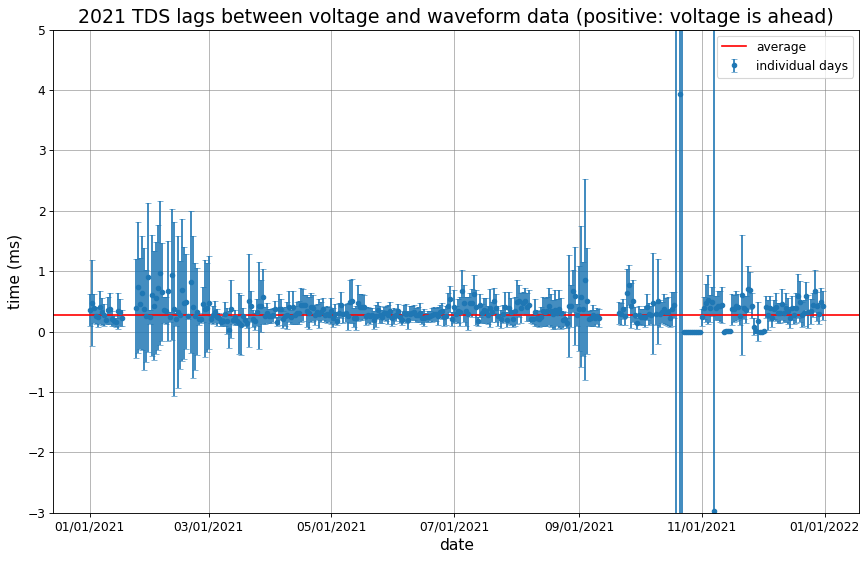

In [106]:



figure(figsize=(13, 8), dpi=80)
plt.errorbar(xp, y*1e3, yerr=s*1e3,fmt='.', markersize=8,  capthick=0.5, capsize=2.5)
plt.rcParams['font.size'] = '11'
plt.ylabel('time (ms)', fontsize=14)
plt.xlabel('date', fontsize=14)
plt.title('2021 TDS lags between voltage and waveform data (positive: voltage is ahead)', fontsize=17)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.axhline(y = 0.26948, color = 'r', linestyle = '-')
plt.ylim(-3, 5) 
plt.legend(['average','individual days'])


In [110]:
y


array([ 3.58162372e-04,  4.70368604e-04,  3.87799214e-04,  2.55059975e-04,
        2.40537765e-04,  4.00870554e-04,  3.28668161e-04,  2.69116611e-04,
        1.99892802e-04,  3.50874641e-04,  3.77290838e-04,  2.13068782e-04,
        1.75394603e-04,  1.58134938e-04,  3.41764603e-04,  3.17838438e-04,
        2.26469686e-04,  3.82098682e-04,  7.30655134e-04,  4.59861130e-04,
        6.44013234e-04,  3.70147595e-04,  2.58167517e-04,  8.99222318e-04,
        2.37813474e-04,  5.99556442e-04,  4.26005011e-04,  5.54917751e-04,
        7.28942581e-04,  9.73114448e-04,  6.56219876e-04,  3.51830092e-04,
        3.46447774e-04,  6.75718708e-04,  2.37347278e-04,  9.42855542e-04,
        3.71578021e-04,  2.02903813e-04,  3.26744061e-04,  2.69475292e-04,
        6.93107874e-04,  4.76583395e-04,  4.96046538e-04,  2.52286261e-04,
        8.17217659e-04,  4.05518693e-04,  2.51794709e-04,  3.25409353e-04,
        2.07018939e-04,  2.00811546e-04,  4.50571734e-04,  3.77532716e-04,
        3.94016361e-04,  

In [21]:
s

array([2.66705017e-04, 7.10876684e-04, 2.39717245e-04, 1.35708753e-04,
       1.62635235e-04, 2.74168153e-04, 2.27233953e-04, 1.80471563e-04,
       7.59620671e-05, 2.19861120e-04, 2.53732121e-04, 1.24775010e-04,
       8.15010380e-05, 7.45223841e-05, 2.93281645e-04, 2.28375616e-04,
       1.34734529e-04, 8.16988359e-04, 1.09033004e-03, 7.55487586e-04,
       9.42807474e-04, 1.00829854e-03, 7.63386520e-04, 1.23080231e-03,
       1.15857215e-04, 1.00193910e-03, 9.04667846e-04, 9.33516371e-04,
       1.03937554e-03, 1.19424354e-03, 8.14769114e-04, 2.17756770e-04,
       2.21318260e-04, 8.31420937e-04, 7.96249369e-05, 1.08956480e-03,
       1.43523052e-03, 1.02586655e-04, 1.25979544e-03, 8.97256089e-04,
       1.17605668e-03, 9.28397271e-04, 7.91469941e-04, 4.69478821e-05,
       1.17352747e-03, 1.17013136e-03, 8.89141697e-04, 7.20008369e-04,
       9.43093697e-05, 6.68212845e-05, 2.86946202e-04, 8.02617755e-04,
       7.33350455e-04, 7.63528057e-04, 5.97053538e-05, 1.47238148e-04,
      

In [24]:
xp

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-10-11', '2021-10-12', '2021-10-13', '2021-10-14',
               '2021-10-15', '2021-10-16', '2021-10-17', '2021-10-18',
               '2021-10-19', '2021-10-20'],
              dtype='datetime64[ns]', length=278, freq=None)

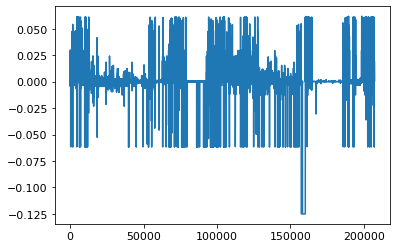

In [74]:
dd = a['lags'][0]
plt.plot(a['lags'][0])

In [75]:
[IIImu, IIIsigma, IIIsig, twosigma, threesigma, _, _]=analyze(dd)

result = (-0.000609171086351565+-2.943272843212755e-05)unit
single measurement std = 0.01339476971283668 unit
meets 2 sigma criterium: False
[9.15550045e-05 9.15550045e-05 2.41476324e-02 ... 5.76033570e-04
 6.06551905e-04 8.96476086e-04]
meets 3 sigma criterium: False
[9.15550045e-05 9.15550045e-05 2.41476324e-02 ... 5.76033570e-04
 6.06551905e-04 8.96476086e-04]
meets double sided p criterium: False
[9.15550045e-05 9.15550045e-05 1.83110009e-04 ... 5.76033570e-04
 6.06551905e-04 8.96476086e-04]
meets single sided p criterium: False
[9.15550045e-05 9.15550045e-05 2.41476324e-02 ... 5.76033570e-04
 6.06551905e-04 8.96476086e-04]


In [86]:
[IIImu, IIIsigma, IIIsig, twosigma, threesigma, _, _] = analyze(threesigma)

result = (0.00026948420837222216+-5.725033378040199e-07)unit
single measurement std = 0.0002439670428521063 unit
meets 2 sigma criterium: False
[9.15550045e-05 9.15550045e-05 1.83110009e-04 ... 5.45515235e-04
 5.76033570e-04 6.06551905e-04]
meets 3 sigma criterium: True
[9.15550045e-05 9.15550045e-05 1.83110009e-04 ... 5.76033570e-04
 6.06551905e-04 8.96476086e-04]
meets double sided p criterium: False
[9.15550045e-05 9.15550045e-05 1.83110009e-04 ... 5.45515235e-04
 5.76033570e-04 6.06551905e-04]
meets single sided p criterium: False
[9.15550045e-05 9.15550045e-05 1.83110009e-04 ... 5.45515235e-04
 5.76033570e-04 6.06551905e-04]


0.26948420837222214

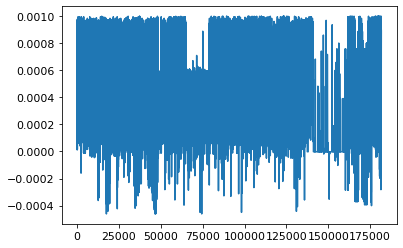

In [87]:
plt.plot(threesigma)
1e3*np.mean(threesigma)

In [88]:
1e3*np.std(threesigma,ddof=1)

0.2439670428521063

(array([ 1130., 26891.,  6650., 12411., 17426., 19329., 22167., 13856.,
        11400.,  6666.]),
 array([-5.72218778e-05, -1.33517715e-05,  3.05183348e-05,  7.43884412e-05,
         1.18258548e-04,  1.62128654e-04,  2.05998760e-04,  2.49868867e-04,
         2.93738973e-04,  3.37609079e-04,  3.81479186e-04]),
 <BarContainer object of 10 artists>)

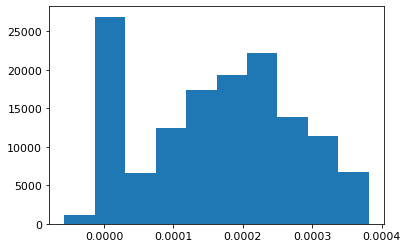

In [103]:
plt.hist(twosigma)

In [100]:
[_, _, _, twosigma, _, _, _] = analyze(twosigma)

result = (0.0001612352093901354+-2.978824848662547e-07)unit
single measurement std = 0.00011062875849840568 unit
meets 2 sigma criterium: True
[9.15550045e-05 9.15550045e-05 1.83110009e-04 ... 3.20442516e-04
 2.82294597e-04 3.12812932e-04]
meets 3 sigma criterium: True
[9.15550045e-05 9.15550045e-05 1.83110009e-04 ... 3.20442516e-04
 2.82294597e-04 3.12812932e-04]
meets double sided p criterium: False
[9.15550045e-05 9.15550045e-05 1.83110009e-04 ... 3.20442516e-04
 2.82294597e-04 3.12812932e-04]
meets single sided p criterium: False
[9.15550045e-05 9.15550045e-05 1.83110009e-04 ... 3.20442516e-04
 2.82294597e-04 3.12812932e-04]


3.962516505971968
2.718812368856818


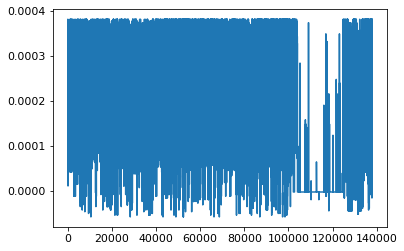

In [109]:
plt.plot(twosigma)
print(np.mean(twosigma)/lsp)
print(np.std(twosigma,ddof=1)/lsp)

In [114]:
xpa = np.concatenate((xpb, xp))
ya = np.concatenate((yb, y))
sa = np.concatenate((sb, s))

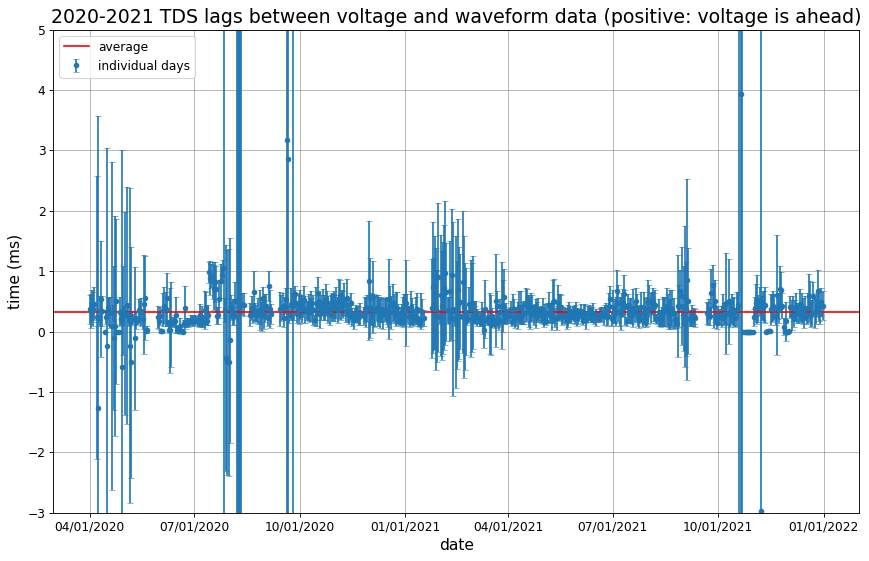

In [149]:
figure(figsize=(13, 8), dpi=80)
plt.errorbar(xpa, ya*1e3, yerr=sa*1e3,fmt='.', markersize=8,  capthick=0.5, capsize=2.5)
plt.rcParams['font.size'] = '11'
plt.ylabel('time (ms)', fontsize=14)
plt.xlabel('date', fontsize=14)
plt.title('2020-2021 TDS lags between voltage and waveform data (positive: voltage is ahead)', fontsize=17)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.axhline(y = 0.317911, color = 'r', linestyle = '-')
plt.ylim(-3, 5) 
plt.legend(['average','individual days'])

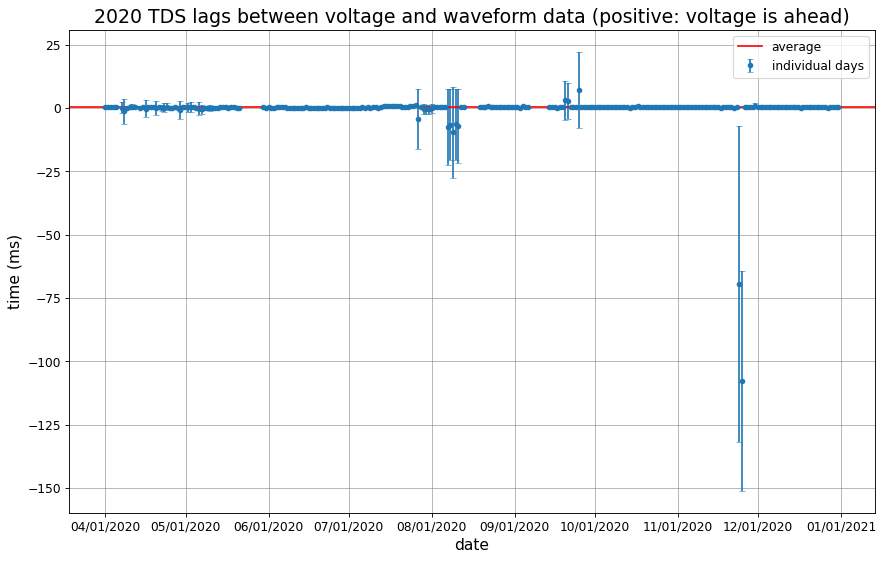

In [151]:
figure(figsize=(13, 8), dpi=80)
plt.errorbar(xpb, yb*1e3, yerr=sb*1e3,fmt='.', markersize=8,  capthick=0.5, capsize=2.5)
plt.rcParams['font.size'] = '11'
plt.ylabel('time (ms)', fontsize=14)
plt.xlabel('date', fontsize=14)
plt.title('2020 TDS lags between voltage and waveform data (positive: voltage is ahead)', fontsize=17)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.axhline(y = 0.42228, color = 'r', linestyle = '-')
#plt.ylim(-3, 5) 
plt.legend(['average','individual days'])

result = (0.00040234205261514524+-3.135503473555001e-05)unit
single measurement std = 0.010272782229695058 unit
meets 2 sigma criterium: False
[ 0.00089266  0.00089648  0.00089266 ... -0.00645463  0.00036622
  0.00035859]
meets 3 sigma criterium: False
[ 0.00089266  0.00089648  0.00089266 ... -0.00645463  0.00036622
  0.00035859]
meets double sided p criterium: False
[ 0.00089266  0.00089648  0.00089266 ... -0.00645463  0.00036622
  0.00035859]
meets single sided p criterium: False
[ 0.00089266  0.00089648  0.00089266 ... -0.00645463  0.00036622
  0.00035859]


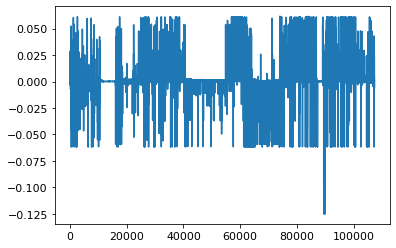

In [125]:
dd = b['lags'][0]
plt.plot(b['lags'][0])
[IIImu, IIIsigma, IIIsig, twosigma, threesigma, _, _]=analyze(dd)

In [133]:
[IIImu, IIIsigma, IIIsig, twosigma, threesigma, _, _]=analyze(threesigma)

result = (0.0004222860873845488+-1.135057405565837e-06)unit
single measurement std = 0.00035232701124446146 unit
meets 2 sigma criterium: False
[0.00089266 0.00089648 0.00089266 ... 0.00082018 0.00036622 0.00035859]
meets 3 sigma criterium: True
[0.00089266 0.00089648 0.00089266 ... 0.00082018 0.00036622 0.00035859]
meets double sided p criterium: False
[0.00089266 0.00089648 0.00089266 ... 0.00082018 0.00036622 0.00035859]
meets single sided p criterium: False
[0.00089266 0.00089648 0.00089266 ... 0.00082018 0.00036622 0.00035859]


0.42228608738454876
0.3523270112444615


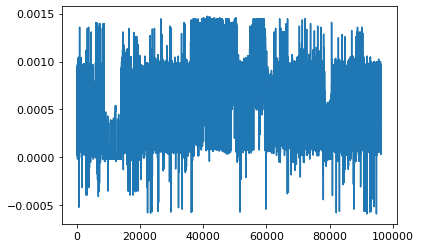

In [135]:
plt.plot(threesigma)
print(np.mean(threesigma)*1e3)
print(np.std(threesigma,ddof=1)*1e3)

In [137]:
dd = np.concatenate((a['lags'][0],b['lags'][0]))

result = (-0.0002638874507906033+-2.2160673622880676e-05)unit
single measurement std = 0.012426863254200159 unit
meets 2 sigma criterium: False
[ 9.15550045e-05  9.15550045e-05  2.41476324e-02 ... -6.45462782e-03
  3.66220018e-04  3.58590434e-04]
meets 3 sigma criterium: False
[ 9.15550045e-05  9.15550045e-05  2.41476324e-02 ... -6.45462782e-03
  3.66220018e-04  3.58590434e-04]
meets double sided p criterium: False
[ 9.15550045e-05  9.15550045e-05  1.83110009e-04 ... -6.45462782e-03
  3.66220018e-04  3.58590434e-04]
meets single sided p criterium: False
[ 9.15550045e-05  9.15550045e-05  1.83110009e-04 ... -6.45462782e-03
  3.66220018e-04  3.58590434e-04]


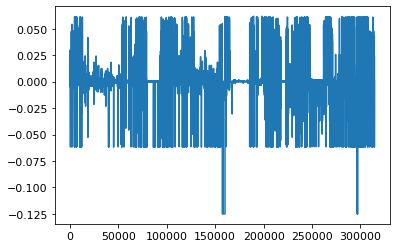

In [138]:
plt.plot(dd)
[IIImu, IIIsigma, IIIsig, twosigma, threesigma, _, _]=analyze(dd)

In [147]:
[IIImu, IIIsigma, IIIsig, twosigma, threesigma, _, _]=analyze(threesigma)

result = (0.00031791117724718816+-5.457362769146542e-07)unit
single measurement std = 0.00028721649704384686 unit
meets 2 sigma criterium: False
[9.15550045e-05 9.15550045e-05 1.83110009e-04 ... 8.20180249e-04
 3.66220018e-04 3.58590434e-04]
meets 3 sigma criterium: True
[9.15550045e-05 9.15550045e-05 1.83110009e-04 ... 8.20180249e-04
 3.66220018e-04 3.58590434e-04]
meets double sided p criterium: False
[9.15550045e-05 9.15550045e-05 1.83110009e-04 ... 7.78217539e-04
 3.66220018e-04 3.58590434e-04]
meets single sided p criterium: False
[9.15550045e-05 9.15550045e-05 1.83110009e-04 ... 8.20180249e-04
 3.66220018e-04 3.58590434e-04]


0.31791117724718815
0.2872164970438469


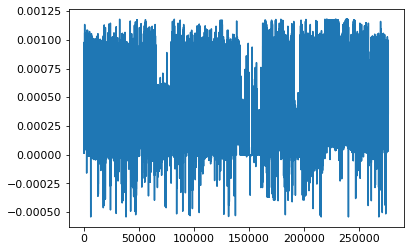

In [154]:
plt.plot(threesigma)
print(np.mean(threesigma)*1e3)
print(np.std(threesigma,ddof=1)*1e3)

In [156]:
1.7*lsp*1e3

0.06917317708333333